In [1]:
import lightkurve as lk
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

/Users/luke/local/miniconda3/envs/py311/lib/python3.11/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/luke/.lightkurve/cache. Please move all the files in the legacy directory /Users/luke/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
r = lk.search_lightcurve("TIC 204294226")
search_result = lk.search_targetpixelfile("TIC 204294226")
print(r)
print(search_result)


SearchResult containing 12 data products.

 #     mission     year       author      exptime target_name distance
                                             s                 arcsec 
--- -------------- ---- ----------------- ------- ----------- --------
  0 TESS Sector 02 2018              SPOC     120   204294226      0.0
  1 TESS Sector 02 2018         TESS-SPOC    1800   204294226      0.0
  2 TESS Sector 29 2020         TESS-SPOC     600   204294226      0.0
  3 TESS Sector 69 2023         TESS-SPOC     200   204294226      0.0
  4 TESS Sector 02 2018               QLP    1800   204294226      0.0
  5 TESS Sector 29 2020               QLP     600   204294226      0.0
  6 TESS Sector 69 2023               QLP     200   204294226      0.0
  7 TESS Sector 02 2018             TASOC     120   204294226      0.0
  8 TESS Sector 02 2018 GSFC-ELEANOR-LITE    1800   204294226      0.0
  9 TESS Sector 02 2018             TASOC    1800   204294226      0.0
 10 TESS Sector 02 2018           

In [3]:
lc0 = r[0].download()
tpf0 = search_result[0].download()

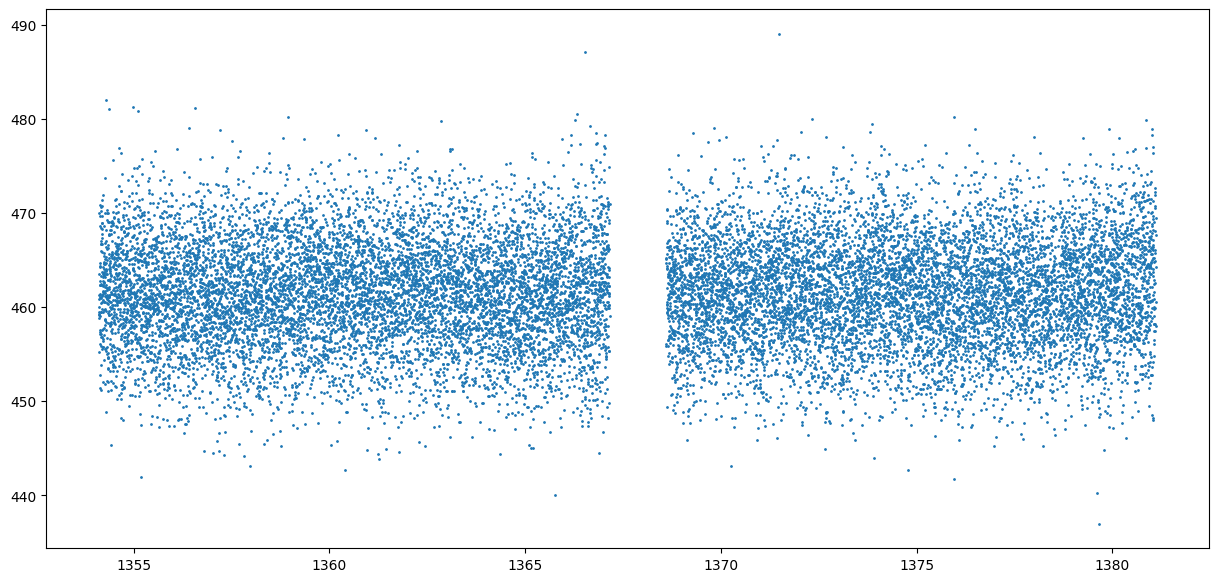

In [4]:
time = np.array(lc0.time.value)
flux = np.array(lc0.pdcsap_flux.value)
plt.figure(figsize=(15,7))
plt.scatter(time, flux, s=1);

lightkurve.Periodogram properties:
      Attribute         Description   Units
---------------------- -------------- -----
                nterms              1      
              targetid      204294226      
          default_view      frequency      
                 label  TIC 204294226      
             ls_method           fast      
frequency_at_max_power        14.7202 1 / d
             max_power      1296.5116   ppm
               nyquist       360.0018 1 / d
   period_at_max_power         0.0679     d
             frequency array (48594,) 1 / d
                period array (48594,)     d
                 power array (48594,)   ppm
                  meta <class 'dict'>      


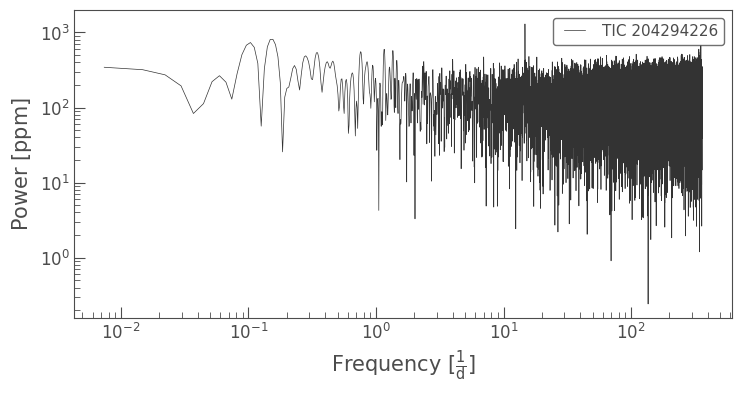

In [5]:
pg = lc0.normalize(unit='ppm').to_periodogram()
pg.plot(scale='log');
pg.show_properties()

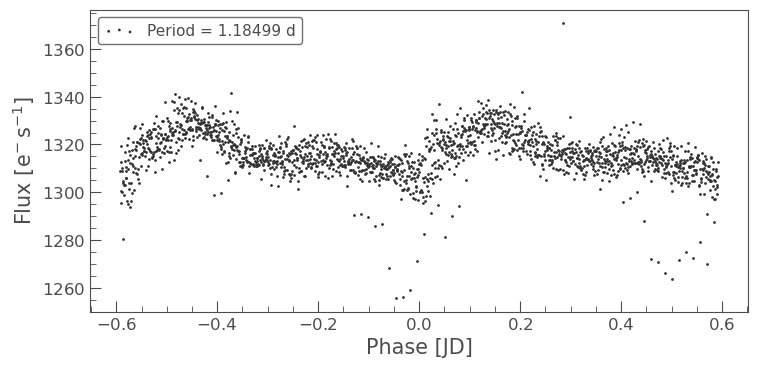

In [19]:
period = 2*pg.period_at_max_power
from astropy import units as u
lc0.bin(time_bin_size=20*u.minute).fold(period).scatter(label=f'Period = {period.value:.5f} d');

In [7]:
tpf0.interact()

In [8]:
tpf0.interact_sky(magnitude_limit=16)

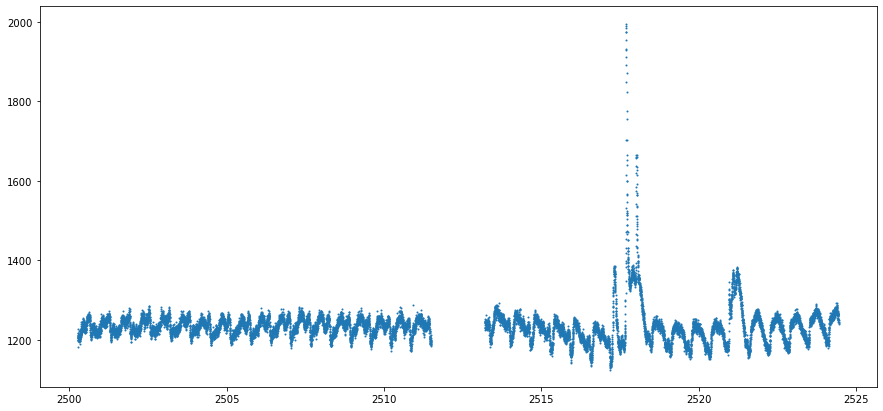

In [5]:
time = np.array(lc1.time.value)
flux = np.array(lc1.pdcsap_flux.value)
plt.figure(figsize=(15,7))
plt.scatter(time, flux, s=1);

In [6]:
tpf1.interact()